# Diplodatos 02 - Análisis Exploratorio y Curación
#### Práctico 03 - Limpieza. Kickstarter dataset
santiago.asa@gmail.com

Importar dataset de Kickstarter y limpiar según checklist del Banco Mundial. Puntos 1 y 2.  
https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning

**Dataset**  
Kickstarter projects - 2016 crowdfunding
Kickstarter projects - 2018 crowdfunding
https://www.kaggle.com/kemical/kickstarter-projects/data

**Checklist**
1. Importando los datos
    * 1.1. Verificar si no hay problemas en la importación. Habilitar chequeos al importar
    * 1.2. Asegurar de tener ids/claves únicas. Chequear que no hay datos duplicados
    * 1.3. Despersonalizar datos y guardarlos en un nuevo archivo. AR: https://www.argentina.gob.ar/aaip/datospersonales/derechos EU: GDPR
    https://cloud.google.com/dlp/docs/transformations-reference
    * 1.4. Nunca modificar los datos crudos u originales https://cloud.google.com/dlp/docs/deidentify-sensitive-data


2. Pasos necesarios
    * 2.1. Etiquetas de variables/columnas: no usar caracteres especiales. Verificar que no haya problemas de codificación/encoding
    * 2.2. Tratar valores faltantes Quitar o imputar
    * 2.3. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas
    * 2.4. No cambiar los nombres de las variables de la fuente de origen
    * 2.5. Verificar la consistencia de las variables Aplicar reglas de integridad
    * 2.6. Identificar y documentar valores atípicos/outliers Calcular estadísticos
    * 2.7. Evaluar cómo comprimir los datos para su almacenamiento más eficiente
    * 2.8. Guardar el set de datos con un nombre informativo.  
  
  
3. Pasos deseables
    * 3.1. Ordenar variables/columnas si es posible – primero ID, luego en el mismo orden que la fuente
    * 3.2. Quitar variables/columnas que no tienen información a analizar
    * 3.3. Renombrar variables de grillas
    * 3.4. Categorizar resultados en “Otros”. Si tiene un campo de texto libre asociado, codificar en nuevos valores de la variable. categórica asociada. Revisar fuzzyness.
    * 3.5. Agregar metadata a los datos: cuando y como fueron obtenidos, limpieza realizada, asunciones, etc. Vincular con etiquetas del código fuente y los datos. Al menos incluir un README.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Importando los datos

### 1.1 Verificar si hay problemas en la importación

In [2]:
import pathlib
path=str(pathlib.Path().absolute())

In [3]:
df=pd.read_csv(path+'/ks-projects-201801.csv')

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Tomamos una muestra al azar, para mirar un poco más que las primeras filas. En una primera inspección visual, revisamos problemas obvios. 

In [5]:
np.random.seed(5)
df.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
127757,1648471472,Sculpterie 2.0,Graphic Design,Design,CAD,2015-08-01,5000.0,2015-06-17 17:37:00,300.0,failed,1,CA,243.49,229.32,3822.05
345009,827477572,When the Glass Breaks & Comes A Thief,Nonfiction,Publishing,USD,2014-10-11,500.0,2014-08-12 22:33:04,30.0,failed,1,US,30.00,30.00,500.00
357727,892327113,World's Largest Performing Rock Band,Rock,Music,USD,2016-03-14,30000.0,2016-02-11 04:13:45,2.0,failed,2,US,2.00,2.00,30000.00
96450,1490064213,Square Stand - iMac Stand,Product Design,Design,USD,2015-07-06,899.0,2015-06-16 00:20:35,138.0,failed,2,US,138.00,138.00,899.00
196445,2000337747,Yvonne Bechet Theater Project,Musical,Theater,USD,2016-01-03,4000.0,2015-12-03 00:24:47,4142.0,successful,51,US,4142.00,4142.00,4000.00


Revisamos la información provista sobre las columnas, y la obtenida al leer el dataset

In [6]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [7]:
info=pd.DataFrame([["ID", "No description provided", "Numeric"],
["name", "No description provided", "String"],
["category", "No description provided", "String"],
["main_category", "No description provided", "String"],
["currency", "No description provided", "String"],
["deadline", "No description provided", "DateTime"],
["goal", "Goal amount in project currency", "Numeric"],
["launched", "No description provided", "DateTime"],
["pledged", "Pledged amount in the project currency", "Numeric"],
["state", "No description provided", "String"],
["backers", "No description provided", "Numeric"],
["country", "No description provided", "String"],
["usd pledged", "Pledged amount in USD (conversion made by KS)", "Numeric"],
["usd_pledged_real", "Pledged amount in USD (conversion made by fixer.io api)", "Numeric"],
["usd_goal_real", "Goal amount in USD", "Numeric"]], columns=["Field name","Field description", "Type"])

info['pandas dtypes']=df.dtypes.values

info

,Field name,Field description,Type,pandas dtypes
0,ID,No description provided,Numeric,int64
1,name,No description provided,String,object
2,category,No description provided,String,object
3,main_category,No description provided,String,object
4,currency,No description provided,String,object
5,deadline,No description provided,DateTime,object
6,goal,Goal amount in project currency,Numeric,float64
7,launched,No description provided,DateTime,object
8,pledged,Pledged amount in the project currency,Numeric,float64
9,state,No description provided,String,object


Las fechas fueron importadas como objetos. Importamos nuevamente, señalando las columnas 'deadline' y 'launched' como datetime.

In [8]:
df=pd.read_csv(path+'/ks-projects-201801.csv',
              parse_dates=['deadline','launched'])

In [9]:
info['pandas dtypes']=df.dtypes.values

info

,Field name,Field description,Type,pandas dtypes
0,ID,No description provided,Numeric,int64
1,name,No description provided,String,object
2,category,No description provided,String,object
3,main_category,No description provided,String,object
4,currency,No description provided,String,object
5,deadline,No description provided,DateTime,datetime64[ns]
6,goal,Goal amount in project currency,Numeric,float64
7,launched,No description provided,DateTime,datetime64[ns]
8,pledged,Pledged amount in the project currency,Numeric,float64
9,state,No description provided,String,object


Revisamos rápidamente la descripción del dataset

In [10]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


En la mayoría de los casos no tiene sentido utilziar notación científica. Cambiamos el formato de display.

In [11]:
pd.set_option('display.float_format',lambda x: '%.5f' %x)

In [12]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00000,378661.00000,378661.00000,378661.00000,374864.00000,378661.00000,378661.00000
mean,1074731191.98876,49080.79152,9682.97934,105.61748,7036.72887,9058.92407,45454.40147
std,619086204.32263,1183391.25909,95636.01000,907.18503,78639.74531,90973.34311,1152950.05509
min,5971.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.01000
25%,538263516.00000,2000.00000,30.00000,2.00000,16.98000,31.00000,2000.00000
50%,1075275634.00000,5200.00000,620.00000,12.00000,394.72000,624.33000,5500.00000
75%,1610148624.00000,16000.00000,4076.00000,56.00000,3034.09000,4050.00000,15500.00000
max,2147476221.00000,100000000.00000,20338986.27000,219382.00000,20338986.27000,20338986.27000,166361390.71000


Incluímos las variables no numéricas

In [13]:
df.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00000,378657,378661,378661,378661,378661,378661.00000,378661,378661.00000,378661,378661.00000,378661,374864.00000,378661.00000,378661.00000
unique,nan,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,nan,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,nan,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,nan,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,nan,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,1074731191.98876,NaN,NaN,NaN,NaN,NaN,49080.79152,NaN,9682.97934,NaN,105.61748,NaN,7036.72887,9058.92407,45454.40147
std,619086204.32263,NaN,NaN,NaN,NaN,NaN,1183391.25909,NaN,95636.01000,NaN,907.18503,NaN,78639.74531,90973.34311,1152950.05509
min,5971.00000,NaN,NaN,NaN,NaN,NaN,0.01000,NaN,0.00000,NaN,0.00000,NaN,0.00000,0.00000,0.01000
25%,538263516.00000,NaN,NaN,NaN,NaN,NaN,2000.00000,NaN,30.00000,NaN,2.00000,NaN,16.98000,31.00000,2000.00000


Revisamos el tamaño de las dimensiones, y el período incluído en este dataset

In [14]:
print('El primer proyecto incluído fue lanzado el día: ' + str(df['launched'].min()))
print('El último proyecto incluído fue lanzado el día: ' + str(df['launched'].max()))
print('El intervalo de tiempo relevado es de ' + str(df['launched'].max() - df['launched'].min()) )

El primer proyecto incluído fue lanzado el día: 1970-01-01 01:00:00
El último proyecto incluído fue lanzado el día: 2018-01-02 15:02:31
El intervalo de tiempo relevado es de 17533 days 14:02:31


In [15]:
df.shape

(378661, 15)

### 1.2 Asegurar ids únicas. Verificar duplicados

Verificamos inexistencia de filas duplicadas. Elegimos la columna ID como índice, y verificamos que sean únicos.

In [16]:
df.duplicated().any()

False

In [17]:
df.set_index('ID',inplace=True)

In [18]:
df.index.duplicated().any()

False

Verificamos proyectos con nombres duplicados, agrupados por categoría

In [19]:
df[df.name.duplicated()].sort_values('main_category')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1980791202,Hearts and Minds,Art,Art,USD,2015-03-11,1000.00000,2015-02-27 18:56:21,455.00000,failed,8,US,455.00000,455.00000,1000.00000
631281226,The Magic Mandap Art Project - Burning Man 2017,Installations,Art,USD,2017-06-12,5000.00000,2017-05-23 10:29:35,10.00000,canceled,1,US,10.00000,10.00000,5000.00000
1762764653,The Hive,Painting,Art,USD,2012-07-22,4000.00000,2012-06-16 23:22:55,494.00000,failed,15,US,494.00000,494.00000,4000.00000
1761710564,Nature Photography,Art,Art,USD,2017-10-05,50.00000,2017-09-05 21:29:45,6.00000,failed,1,US,0.00000,6.00000,50.00000
856947963,MFA Thesis Exhibition,Art,Art,USD,2012-10-22,1000.00000,2012-09-22 20:03:53,1751.00000,successful,28,US,1751.00000,1751.00000,1000.00000
638106921,Canvas,Painting,Art,USD,2014-08-13,150.00000,2014-07-14 18:18:20,15.00000,failed,2,US,15.00000,15.00000,150.00000
1756170066,An Artist's Dream,Art,Art,CAD,2014-11-23,55000.00000,2014-09-24 17:45:10,0.00000,failed,0,CA,0.00000,0.00000,48258.31000
1921358349,Inherent,Sculpture,Art,USD,2015-08-29,225000.00000,2015-06-30 21:11:03,0.00000,failed,0,US,0.00000,0.00000,225000.00000
442435505,The Beautiful People,Art,Art,USD,2016-01-18,340.00000,2015-12-18 20:27:05,110.00000,failed,3,US,110.00000,110.00000,340.00000


### 1.3. Despersonalizar datos y guardarlos en un nuevo archivo.

Algunas técnicas de https://cloud.google.com/dlp/docs/transformations-reference
* Reemplazo: Reemplaza cada valor de entrada con un valor determinado.
* Ocultamiento: Quita un valor y lo oculta.
* Enmascaramiento con caracteres: Enmascara una string por completo o parcialmente mediante el reemplazo de un número determinado de caracteres con un carácter fijo especificado..
* Seudonimización mediante el reemplazo de un valor de entrada con un hash criptográfico: Reemplaza valores de entrada con una string hexadecimal de 32 bytes mediante una clave de encriptación de datos.
* Cambio de fechas: Cambia las fechas por un número de días al azar, con la opción de ser coherente en el mismo contexto..
* Seudonimización mediante el reemplazo con token de preservación de formato criptográfico: Reemplaza un valor de entrada con un token, o valor sustituto, de la misma longitud mediante la encriptación de preservación de formato (FPE) con el modo de operación FFX. Esto permite que se use el resultado en sistemas con validación de formato o que necesitan aparecer como reales a pesar de que la información no se revela.
* Valores de depósito con base en rangos de tamaño fijos: Enmascara los valores de entrada y los reemplaza por depósitos, o rangos dentro de los cuales se encuentra el valor de entrada.
* Valores de depósito con base en rangos de tamaño personalizados: Valores de entrada de depósito con base en rangos configurables por el usuario y valores de reemplazo.
* Extracción de datos de tiempo: EExtrae o preserva una porción de los valores Date, Timestamp y TimeOfDay.

In [20]:
from hashlib import md5

In [21]:
md5(b'asd').hexdigest()

'7815696ecbf1c96e6894b779456d330e'

In [22]:
def hashit(x):
    if isinstance(x,float):
        return md5(str(x).encode()).hexdigest()
    return md5(x.encode()).hexdigest()

In [23]:
df.name=df.name.apply(hashit)

### 1.4 Nunca modificar los datos crudos. Trabajar sobre una copia

In [24]:
df.to_csv(path + 'ks-projects-201801-pandas-clean.csv')

## 2.Pasos necesarios

In [25]:
df=pd.read_csv(path + 'ks-projects-201801-pandas-clean.csv',
              parse_dates=['deadline','launched'])

In [26]:
df.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00000,378661,378661,378661,378661,378661,378661.00000,378661,378661.00000,378661,378661.00000,378661,374864.00000,378661.00000,378661.00000
unique,nan,375765,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,nan,2cdff1887ad0f0d341ca3f08841de3a0,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,nan,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,nan,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,nan,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,1074731191.98876,NaN,NaN,NaN,NaN,NaN,49080.79152,NaN,9682.97934,NaN,105.61748,NaN,7036.72887,9058.92407,45454.40147
std,619086204.32263,NaN,NaN,NaN,NaN,NaN,1183391.25909,NaN,95636.01000,NaN,907.18503,NaN,78639.74531,90973.34311,1152950.05509
min,5971.00000,NaN,NaN,NaN,NaN,NaN,0.01000,NaN,0.00000,NaN,0.00000,NaN,0.00000,0.00000,0.01000
25%,538263516.00000,NaN,NaN,NaN,NaN,NaN,2000.00000,NaN,30.00000,NaN,2.00000,NaN,16.98000,31.00000,2000.00000


### 2.1 Etiquetas de variables/columnas: no usar caracteres especiales. Verificar que no haya problemas de codificación/encoding

El encoding por defecto es utf-8  
Pueden ser útiles en este paso
* chardet, para identificar el encoding
* al leer el csv, entregar el encoding en el parámetro 'encoding='' '
* revisar casos de Mojibake. Se puede utilizar la librería ftfy.badness con su método sequence_weirdness para rankear expresiones según su extrañeza.

Por lo demás, revisar en nuestro dataset que los únicos caracteres sean ascii_letters y digits

In [27]:
import string

In [28]:
string.ascii_letters + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

Utilizaremos una expresión compuesta por:  
* '^' asserts position at start of a line.  
* '\w+' matches any word character (equal to [a-zA-Z0-9_])  
* '+' Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)
* $ asserts position at the end of a line


In [29]:
df.columns[~df.columns.str.match(r'^(\w+)$')]

Index(['usd pledged'], dtype='object')

In [30]:
df.columns = df.columns.str.replace(' ','_')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,a6828ae8a2eca25f0dd7035efc0af0a0,Poetry,Publishing,GBP,2015-10-09,1000.00000,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,1533.95000
1,1000003930,81609b3bdc0b96f429672d69702f2524,Narrative Film,Film & Video,USD,2017-11-01,30000.00000,2017-09-02 04:43:57,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000
2,1000004038,c12f5c3bace2f0213cdb2679a265dca0,Narrative Film,Film & Video,USD,2013-02-26,45000.00000,2013-01-12 00:20:50,220.00000,failed,3,US,220.00000,220.00000,45000.00000
3,1000007540,4dbdcf09c86bbf5683ec39bc57b77f81,Music,Music,USD,2012-04-16,5000.00000,2012-03-17 03:24:11,1.00000,failed,1,US,1.00000,1.00000,5000.00000
4,1000011046,9c01404a2ef702811c2088ce139042ad,Film & Video,Film & Video,USD,2015-08-29,19500.00000,2015-07-04 08:35:03,1283.00000,canceled,14,US,1283.00000,1283.00000,19500.00000


In [31]:
df.columns[~df.columns.str.match(r'^(\w+)$')]

Index([], dtype='object')

No hay caracteres especiales en los nombres de columnas.

### 2.2. Tratar valores faltantes Quitar o imputar

In [32]:
df.isnull().any()

ID                  False
name                False
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd_pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

In [33]:
df.isnull().sum()

ID                     0
name                   0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

¿Cuánto representan del total, los valores nulos?

In [34]:
1-len(df.dropna())/len(df)

0.010027438790897403

Son poco significativos en cuanto a cantidad. Observamos en el dataset, para revisar si hay alguna característica sobresaliente.

In [35]:
df[df.usd_pledged.isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
169,1000694855,317cb508c0d274aa44ea6dc7135f67e7,Film & Video,Film & Video,USD,2014-09-20,6500.00000,2014-08-06 21:28:36,555.00000,undefined,0,"N,0""",nan,555.00000,6500.00000
328,100149523,5e380aed7fb3ac232113ad8b84f6e281,Music,Music,AUD,2015-08-25,4500.00000,2015-08-04 12:05:17,4767.00000,undefined,0,"N,0""",nan,3402.08000,3211.53000
632,1003023003,db6c3338a76817fba7fa342ed6e8484f,Music,Music,USD,2015-04-09,3500.00000,2015-03-10 20:06:13,3576.00000,undefined,0,"N,0""",nan,3576.00000,3500.00000
647,1003130892,c6453b947fa89bb74055d6ac199670cb,Music,Music,USD,2015-11-26,6000.00000,2015-11-02 22:09:19,7007.80000,undefined,0,"N,0""",nan,7007.80000,6000.00000
749,1003629045,82871f83555fc30a3126ee35bc582f24,Music,Music,USD,2016-03-21,3000.00000,2016-02-23 03:09:49,3660.38000,undefined,0,"N,0""",nan,3660.38000,3000.00000
824,1004013077,8c862d0bdb17b09b0f4648d6481a2ce3,Music,Music,CAD,2014-10-10,4000.00000,2014-09-10 22:51:01,4760.00000,undefined,0,"N,0""",nan,4251.14000,3572.39000
844,1004126342,39bc2adfb03ba4b249a05a574a9e3128,Music,Music,USD,2015-06-11,5000.00000,2015-05-15 02:12:35,6370.00000,undefined,0,"N,0""",nan,6370.00000,5000.00000
864,1004255433,1977254adc7cd06aaf8f3af17ff2ec6f,Film & Video,Film & Video,USD,2015-11-07,6000.00000,2015-10-10 18:45:24,6695.00000,undefined,0,"N,0""",nan,6695.00000,6000.00000
870,1004298993,941466bc8d50d9e1eb8364848b604483,Music,Music,USD,2015-03-28,2750.00000,2015-02-11 19:28:27,2926.00000,undefined,0,"N,0""",nan,2926.00000,2750.00000
890,1004402863,eb8159308f724a27771ec428d74068f6,Music,Music,USD,2015-12-11,1200.00000,2015-11-11 21:02:55,1585.00000,undefined,0,"N,0""",nan,1585.00000,1200.00000


In [36]:
df[df.usd_pledged.isnull()].describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
count,3797.00000,3797,3797,3797,3797,3797,3797.00000,3797,3797.00000,3797,3797.00000,3797,0.00000,3797.00000,3797.00000
unique,nan,3764,28,12,10,722,nan,3797,nan,6,nan,1,nan,nan,nan
top,nan,2cdff1887ad0f0d341ca3f08841de3a0,Music,Music,USD,2015-05-01 00:00:00,nan,2015-10-27 17:00:11,nan,undefined,nan,"N,0""",nan,nan,nan
freq,nan,28,2387,2388,2738,26,nan,1,nan,3562,nan,3797,nan,nan,nan
first,nan,NaN,NaN,NaN,NaN,2012-04-24 00:00:00,nan,2012-03-14 19:05:44,nan,NaN,nan,NaN,nan,nan,nan
last,nan,NaN,NaN,NaN,NaN,2016-07-07 00:00:00,nan,2016-05-21 20:45:12,nan,NaN,nan,NaN,nan,nan,nan
mean,1082611780.87832,NaN,NaN,NaN,NaN,NaN,5413.35291,NaN,3023.26474,NaN,0.00000,NaN,nan,2949.85060,5097.30646
std,614206486.23847,NaN,NaN,NaN,NaN,NaN,37466.24064,NaN,44919.41170,NaN,0.00000,NaN,nan,44881.71909,37258.79402
min,629014.00000,NaN,NaN,NaN,NaN,NaN,108.00000,NaN,0.00000,NaN,0.00000,NaN,nan,0.00000,85.28000
25%,555405348.00000,NaN,NaN,NaN,NaN,NaN,2000.00000,NaN,5.00000,NaN,0.00000,NaN,nan,5.00000,2250.00000


Se observa que hay un valor único de clave country, 'N,0"'  
Es decir, todos los proyectos con nulo dinero comprometido provienen del mismo país.  
¿Lo inverso es cierto? Es decir, todos los proyectos del país tienen nulo dinero completido.  
Vemos si hay alguno que no cumpla esta condición.

In [37]:
df[~(df.usd_pledged.isnull()) & (df.country == 'N,0"')].size

0

O bien nadie patrocina los proyectos del país, o hay un error sistemático en la recolección de datos. Supondremos lo primero, y completaremos los valores con "0"

In [38]:
df = df.fillna(0)

In [39]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

### 2.3. Codificar variables: las variables categóricas deben ser etiquetadas como variables numéricas, no como cadenas

* Se generará un encoding para una columna categórica
* Se generarán columnas binarizadas para una columna categórica

Encoding para main_category

In [40]:
from sklearn import preprocessing

In [41]:
df.describe(include=['O'])

,name,category,main_category,currency,state,country
count,378661,378661,378661,378661,378661,378661
unique,375765,159,15,14,6,23
top,2cdff1887ad0f0d341ca3f08841de3a0,Product Design,Film & Video,USD,failed,US
freq,41,22314,63585,295365,197719,292627


Utilizaremos un label encoder de sklearn

In [42]:
column='main_category'
#crear el encoder
le = preprocessing.LabelEncoder()
#ajustar el encoder
le.fit(df[column])

LabelEncoder()

Revisamos el encoding obtenido

In [43]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

Aplicamos el encoding a la columna del dataframe

In [47]:
df[column] = le.transform(df[column])
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,a6828ae8a2eca25f0dd7035efc0af0a0,Poetry,12,GBP,2015-10-09,1000.00000,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,1533.95000
1,1000003930,81609b3bdc0b96f429672d69702f2524,Narrative Film,6,USD,2017-11-01,30000.00000,2017-09-02 04:43:57,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000
2,1000004038,c12f5c3bace2f0213cdb2679a265dca0,Narrative Film,6,USD,2013-02-26,45000.00000,2013-01-12 00:20:50,220.00000,failed,3,US,220.00000,220.00000,45000.00000
3,1000007540,4dbdcf09c86bbf5683ec39bc57b77f81,Music,10,USD,2012-04-16,5000.00000,2012-03-17 03:24:11,1.00000,failed,1,US,1.00000,1.00000,5000.00000
4,1000011046,9c01404a2ef702811c2088ce139042ad,Film & Video,6,USD,2015-08-29,19500.00000,2015-07-04 08:35:03,1283.00000,canceled,14,US,1283.00000,1283.00000,19500.00000


Se pueden retomar las categorías con el método inverse_transform()

In [48]:
df[column] = le.inverse_transform(df[column])
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,a6828ae8a2eca25f0dd7035efc0af0a0,Poetry,Publishing,GBP,2015-10-09,1000.00000,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,1533.95000
1,1000003930,81609b3bdc0b96f429672d69702f2524,Narrative Film,Film & Video,USD,2017-11-01,30000.00000,2017-09-02 04:43:57,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000
2,1000004038,c12f5c3bace2f0213cdb2679a265dca0,Narrative Film,Film & Video,USD,2013-02-26,45000.00000,2013-01-12 00:20:50,220.00000,failed,3,US,220.00000,220.00000,45000.00000
3,1000007540,4dbdcf09c86bbf5683ec39bc57b77f81,Music,Music,USD,2012-04-16,5000.00000,2012-03-17 03:24:11,1.00000,failed,1,US,1.00000,1.00000,5000.00000
4,1000011046,9c01404a2ef702811c2088ce139042ad,Film & Video,Film & Video,USD,2015-08-29,19500.00000,2015-07-04 08:35:03,1283.00000,canceled,14,US,1283.00000,1283.00000,19500.00000


More about preprocessing in http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Binarizer para state

In [49]:
from sklearn.preprocessing import LabelBinarizer

In [50]:
column2 = 'state'
lb = LabelBinarizer()
lb_results = lb.fit_transform(df[column2])
pd.DataFrame(lb_results, columns=((column2 + '_') + pd.Series(lb.classes_))).head()

,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


### 2.4. No cambiar los nombres de las variables de la fuente de origen

### 2.5. Verificar la consistencia de las variables. Aplicar reglas de integridad

In [51]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
0,1000002330,a6828ae8a2eca25f0dd7035efc0af0a0,Poetry,Publishing,GBP,2015-10-09,1000.00000,2015-08-11 12:12:28,0.00000,failed,0,GB,0.00000,0.00000,1533.95000
1,1000003930,81609b3bdc0b96f429672d69702f2524,Narrative Film,Film & Video,USD,2017-11-01,30000.00000,2017-09-02 04:43:57,2421.00000,failed,15,US,100.00000,2421.00000,30000.00000
2,1000004038,c12f5c3bace2f0213cdb2679a265dca0,Narrative Film,Film & Video,USD,2013-02-26,45000.00000,2013-01-12 00:20:50,220.00000,failed,3,US,220.00000,220.00000,45000.00000
3,1000007540,4dbdcf09c86bbf5683ec39bc57b77f81,Music,Music,USD,2012-04-16,5000.00000,2012-03-17 03:24:11,1.00000,failed,1,US,1.00000,1.00000,5000.00000
4,1000011046,9c01404a2ef702811c2088ce139042ad,Film & Video,Film & Video,USD,2015-08-29,19500.00000,2015-07-04 08:35:03,1283.00000,canceled,14,US,1283.00000,1283.00000,19500.00000


Algunas preguntas:  
* ¿Existen proyectos con dinero comprometido, pero sin patrocinadores?
* ¿Hay proyectos exitosos que no pasaron el objetivo?
* ¿Cómo es la relación entre el dinero obtenido y el objetivo, en cada segmento de éxito?
* ¿Cuánto dinero se obtiene en promedio por estado y categoría?

¿Existen proyectos con dinero comprometido, pero sin patrocinadores?

In [52]:
df[(df.pledged > 0) & (df.backers==0)].shape[0]

3082

¿Hay proyectos exitosos que no pasaron el objetivo?

In [53]:
df[(df.state=='successful') & (df.pledged < df.goal)].shape[0]

5

¿Cómo es la relación entre el dinero obtenido y el objetivo, en cada segmento de éxito?

In [54]:
df_grouped = df.groupby('state')[['goal','pledged']].aggregate('mean')
df_grouped['pledged'] / df_grouped['goal']

state
canceled     0.03070
failed       0.02119
live         0.11836
successful   2.37133
suspended    0.05964
undefined    0.51747
dtype: float64

¿Cuánto dinero se obtiene en promedio por estado y categoría?

In [55]:
df.pivot_table(values='usd_pledged', index='state', columns='main_category')

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,405.93871,722.45957,342.50722,455.17951,3361.21894,996.49366,1468.04855,715.48814,3312.50036,198.61281,585.90743,418.69630,451.11217,3959.58156,1472.81056
failed,554.07153,869.11121,263.54089,555.21051,2353.08329,685.99675,1368.35720,927.00791,1970.81422,452.95493,557.36913,565.53226,539.22124,2018.73019,892.50248
live,887.49345,934.78092,95.42579,182.59278,3559.01151,443.47564,336.92937,1014.10625,1678.80394,762.77871,434.77569,832.48375,1031.70759,2028.48849,479.18439
successful,5420.99326,9178.67842,4053.91705,4445.78799,43545.98918,15136.85402,12403.29031,14227.41487,41643.05442,8598.26939,6283.11470,7897.05608,7257.91179,67226.64383,5289.16583
suspended,436.69802,347.47348,201.33264,320.43462,11424.97490,3539.28529,2463.23761,2708.65353,2497.18991,44.77212,340.77497,159.96218,422.83121,22953.52377,57.07667
undefined,nan,nan,nan,0.00000,0.00000,0.00000,0.00000,nan,0.00000,nan,0.00000,0.00000,0.00000,0.00000,0.00000


In [56]:
df.pivot_table(values='usd_pledged', index='state', columns='main_category').max()

main_category
Art             5420.99326
Comics          9178.67842
Crafts          4053.91705
Dance           4445.78799
Design         43545.98918
Fashion        15136.85402
Film & Video   12403.29031
Food           14227.41487
Games          41643.05442
Journalism      8598.26939
Music           6283.11470
Photography     7897.05608
Publishing      7257.91179
Technology     67226.64383
Theater         5289.16583
dtype: float64

La categoría de Tecnología es la que más dinero recibe en promedio (proyectos exitosos)

### 2.6. Identificar y documentar valores atípicos/outliers Calcular estadísticos

In [57]:
%matplotlib inline

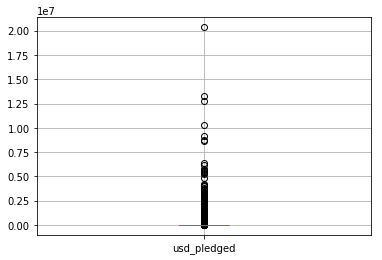

In [58]:
df.boxplot(column='usd_pledged')

*There are many rules of thumb for how to define an outlier but there is no silver bullet. One rule of thumb is that any data point that is three standard deviations away from the mean of the same data point for all observations.*

In [59]:
outliers = df[df.usd_pledged > (df.usd_pledged.mean() + 3 * df.usd_pledged.std())]
outliers.shape

(1201, 15)

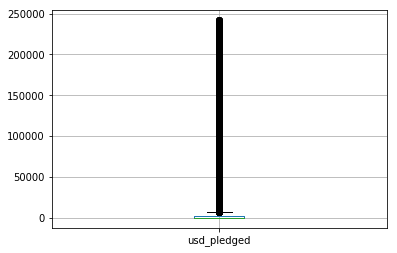

In [60]:
df.drop(outliers.index).boxplot(column='usd_pledged')

Outliers por estado de éxito

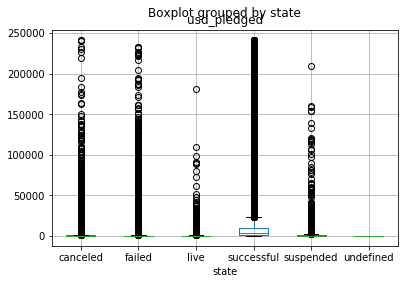

In [61]:
df.drop(outliers.index).boxplot(column='usd_pledged', by='state')

Otros outliers a evaluar podrían ser, por ejemplo, entre los valores de 'usd_goal_real'

### 2.7. Evaluar cómo comprimir los datos para su almacenamiento más eficiente

En este caso:
* Se trata de un archivo muy pequeño
* No hay requisitos especiales en cuanto a la velocidad de lectura o escritura de los datos.

Por lo tanto, no hay necesidad especial de compresión y pueden ser almacenados en disco local.

### 2.8. Guardar el set de datos con un nombre informativo.

In [62]:
df.to_csv(path + 'ks-projects-201801-pandas-clean-final.csv')